# Parsing

# Plotting

## Latency y-log

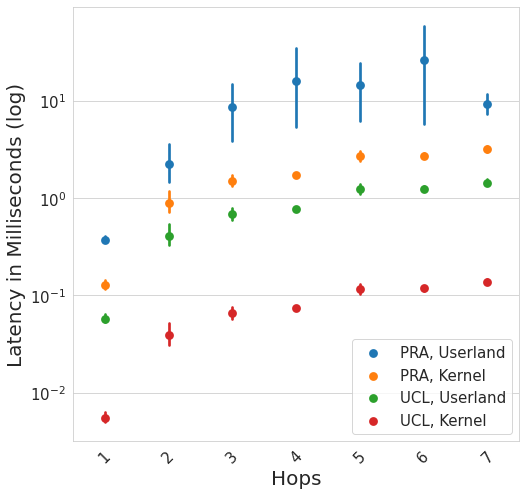

In [1]:
import pandas as pd
import seaborn as sns
latency_data = pd.read_pickle('Latency/latDatFinal.pkl')
latency_data['Hue'] = latency_data['Config Type'] + ", " + latency_data['Execution Space']
latency_data['Latency'] = latency_data['Latency'] *1000
sns.set_style("whitegrid")
ax = sns.pointplot(data = latency_data, x='Hops', y="Latency", hue="Hue" ,join=False)
ax.xaxis.set_tick_params(labelsize=15,rotation=45)
ax.set_xlabel("Hops", fontsize=20)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_ylabel("Latency in Milliseconds (log)", fontsize=20)
ax.legend(prop={'size':15})
ax.set_yscale('log')
figur = ax.get_figure()
figur.set_size_inches(8, 8)
#figur.savefig("Per_Hop_Latency_ylog.svg", bbox_inches='tight')

## Latency

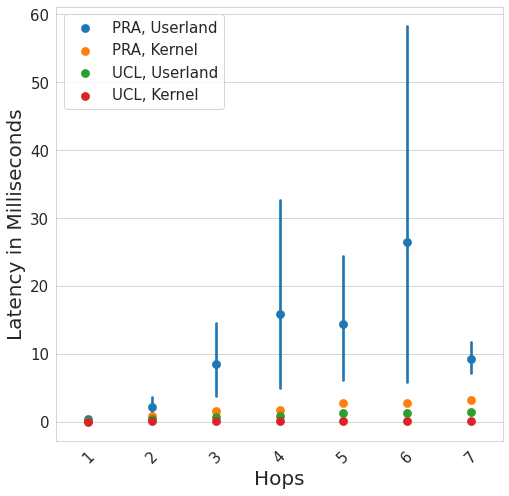

In [2]:
import pandas as pd
import seaborn as sns
latency_data = pd.read_pickle('Latency/latDatFinal.pkl')
latency_data['Hue'] = latency_data['Config Type'] + ", " + latency_data['Execution Space']
latency_data['Latency'] = latency_data['Latency'] *1000
sns.set_style("whitegrid")
ax = sns.pointplot(data = latency_data, x='Hops', y="Latency", hue="Hue",join=False)
ax.xaxis.set_tick_params(labelsize=15,rotation=45)
ax.set_xlabel("Hops", fontsize=20)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_ylabel("Latency in Milliseconds", fontsize=20)
ax.legend(prop={'size':15})
figur = ax.get_figure()
figur.set_size_inches(8, 8)
#figur.savefig("Per_Hop_Latency.svg", bbox_inches='tight')

## Latency per Minute with 10.000 data packets and 7 hops

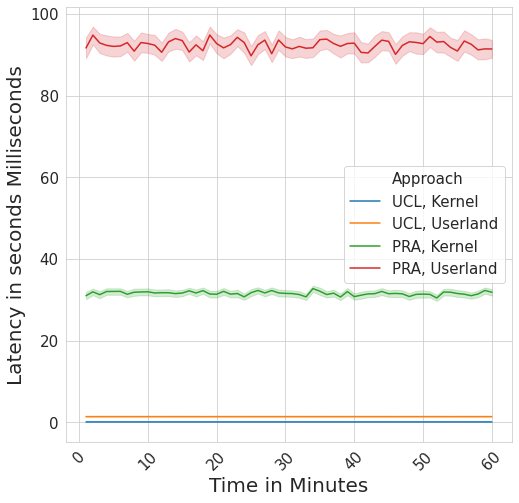

In [3]:
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")
throughput_data = pd.read_pickle('LatencyHop_PerMinute.pkl')
throughput_data['Approach'] = throughput_data['Config_Type'] + ", " + throughput_data['Execution Space']
throughput_data['Latency'] = throughput_data['Latency']*1000 
ax = sns.lineplot(data = throughput_data, x='Minute', y="Latency", hue="Approach")
#x = sns.pointplot(data = df, x='Sampling Rate', y="Recall", hue="Ratio interest / data packets", ci="sd" ,join=True)
ax.xaxis.set_tick_params(labelsize=15,rotation=45)
ax.set_xlabel("Time in Minutes", fontsize=20)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_ylabel("Latency in seconds Milliseconds", fontsize=20)
ax.legend(prop={'size':15})
#ax.set_yscale('log')
#ax.set_xscale('log')
figur = ax.get_figure()
figur.set_size_inches(8, 8)
#figur.savefig("Latency_Minute.svg", bbox_inches='tight')

## Table for Mean latency

In [4]:
import pandas as pd
import seaborn as sns
latency_data = pd.read_pickle('Latency/latDatFinal.pkl')
#latency_data_ucl_Kernel = latency_data[(latency_data['Config Type'] == "UCL")]
#latency_data_ucl_Kernel = latency_data_ucl_Kernel[(latency_data_ucl_Kernel['Execution Space'] == "Kernel")]
MeanData = {"Config Type":[],"Execution Space":[],"Hops":[],"Mean Latency":[]}
for config_type in latency_data['Config Type'].unique():
    latency_data_config = latency_data[(latency_data['Config Type'] == config_type)]
    for execution_space in latency_data_config['Execution Space'].unique():
        latency_data_execution = latency_data_config[(latency_data_config['Execution Space'] == execution_space)]
        for hop in latency_data_execution['Hops'].unique():
            latency_data_hops = latency_data_execution[(latency_data_execution['Hops'] == hop)]
            durchschnitt = sum(latency_data_hops['Latency'])/len(latency_data_hops['Latency'])
            MeanData['Config Type'].append(config_type)
            MeanData['Execution Space'].append(execution_space)
            MeanData['Hops'].append(hop)
            MeanData['Mean Latency'].append(durchschnitt)
            #print(config_type + ", " + execution_space + ", " + latency_data_hops + ": " + mean)

#latency_data['Hue'] = latency_data['Config Type'] + ", " + latency_data['Execution Space']
meandf = pd.DataFrame(MeanData)
meandf.head(100)
#latency_data_ucl_Kernel.head(100)

,Config Type,Execution Space,Hops,Mean Latency
0,PRA,Userland,1,0.000372
1,PRA,Userland,2,0.002212
2,PRA,Userland,3,0.008542
3,PRA,Userland,4,0.015858
4,PRA,Userland,5,0.014344
5,PRA,Userland,6,0.026420
6,PRA,Userland,7,0.009227
7,PRA,Kernel,1,0.000127
8,PRA,Kernel,2,0.000893
9,PRA,Kernel,3,0.001500


## Overall Interest Packets

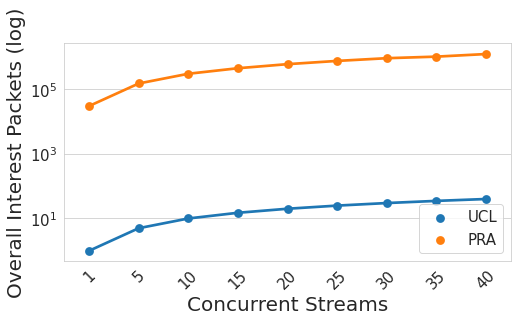

In [5]:
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")
latency_data = pd.read_pickle('InterestPackets_Overall.pkl')
ax = sns.pointplot(data = latency_data, x='Concurrent_Streams', y="Interest_Packets", hue="Approach", ci="sd" ,join=True)
#x = sns.pointplot(data = df, x='Sampling Rate', y="Recall", hue="Ratio interest / data packets", ci="sd" ,join=True)
ax.xaxis.set_tick_params(labelsize=15,rotation=45)
ax.set_xlabel("Concurrent Streams", fontsize=20)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_ylabel("Overall Interest Packets (log)", fontsize=20)
ax.legend(prop={'size':15})
ax.set_yscale('log')
#ax.set_xscale('log')
figur = ax.get_figure()
figur.set_size_inches(8, 4)
#figur.savefig("InterestPackets_ConcurrentStreams.svg", bbox_inches='tight')

## Interest Packets/ Second over Time

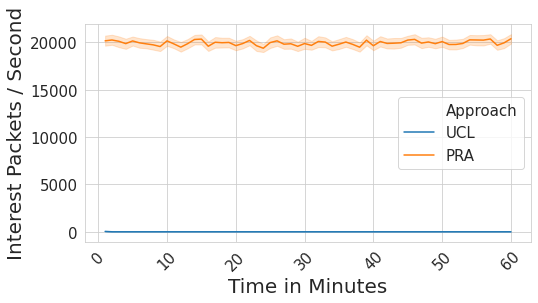

In [6]:
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")
latency_data = pd.read_pickle('InterestPackets_PerMinute.pkl')
plotData = latency_data[latency_data['Concurrent_Streams']==40]
ax = sns.lineplot(data = plotData, x='Minute', y="Interest_Packets", hue="Approach")
#x = sns.pointplot(data = df, x='Sampling Rate', y="Recall", hue="Ratio interest / data packets", ci="sd" ,join=True)
ax.xaxis.set_tick_params(labelsize=15,rotation=45)
ax.set_xlabel("Time in Minutes", fontsize=20)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_ylabel("Interest Packets / Second", fontsize=20)
ax.legend(prop={'size':15})
#ax.set_yscale('log')
#ax.set_xscale('log')
figur = ax.get_figure()
figur.set_size_inches(8, 4)
#figur.savefig("InterestPackets_Minute.svg", bbox_inches='tight')